<a href="https://colab.research.google.com/github/NadaOsamaAhmed/Myproject/blob/master/Copy_of_notebook76e2d2bef6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
sshikamaru_fruit_recognition_path = kagglehub.dataset_download('sshikamaru/fruit-recognition')

print('Data source import complete.')


Using Colab cache for faster access to the 'fruit-recognition' dataset.
Data source import complete.


In [ ]:
import kagglehub
sshikamaru_fruit_recognition_path = kagglehub.dataset_download('sshikamaru/fruit-recognition')

print('Data source import complete.')


Using Colab cache for faster access to the 'fruit-recognition' dataset.
Data source import complete.


In [ ]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)



/kaggle/input
/kaggle/input/fruit-recognition
/kaggle/input/fruit-recognition/test
/kaggle/input/fruit-recognition/test/test
/kaggle/input/fruit-recognition/train
/kaggle/input/fruit-recognition/train/train
/kaggle/input/fruit-recognition/train/train/Orange
/kaggle/input/fruit-recognition/train/train/Tomato
/kaggle/input/fruit-recognition/train/train/Passion Fruit
/kaggle/input/fruit-recognition/train/train/Cucumber Ripe
/kaggle/input/fruit-recognition/train/train/Cactus fruit
/kaggle/input/fruit-recognition/train/train/Pomegranate
/kaggle/input/fruit-recognition/train/train/Plum
/kaggle/input/fruit-recognition/train/train/Pineapple
/kaggle/input/fruit-recognition/train/train/Papaya
/kaggle/input/fruit-recognition/train/train/Potato Red
/kaggle/input/fruit-recognition/train/train/Kiwi
/kaggle/input/fruit-recognition/train/train/Limes
/kaggle/input/fruit-recognition/train/train/Apple Braeburn
/kaggle/input/fruit-recognition/train/train/Pear
/kaggle/input/fruit-recognition/train/train/On

Classes: ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
Epoch 1/9 | Train Acc: 63.42% | Val Acc: 92.90%
Epoch 2/9 | Train Acc: 87.55% | Val Acc: 93.14%
Epoch 3/9 | Train Acc: 91.19% | Val Acc: 98.25%
Epoch 4/9 | Train Acc: 92.76% | Val Acc: 99.80%
Epoch 5/9 | Train Acc: 94.08% | Val Acc: 99.96%
Epoch 6/9 | Train Acc: 94.71% | Val Acc: 99.70%
Epoch 7/9 | Train Acc: 95.35% | Val Acc: 99.55%
Epoch 8/9 | Train Acc: 95.82% | Val Acc: 99.99%
Epoch 9/9 | Train Acc: 96.36% | Val Acc: 99.92%


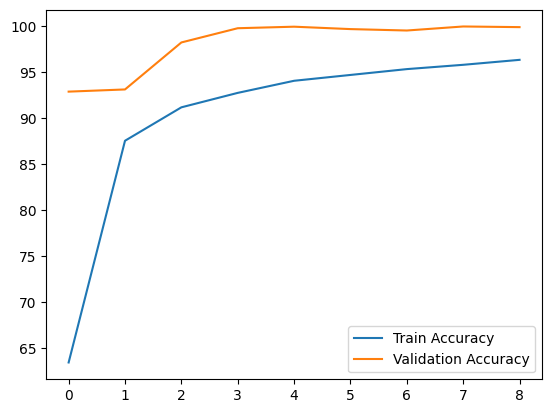

0664.jpg -> Orange
1269.jpg -> Pear
3863.jpg -> Potato Red
2193.jpg -> Apricot
0733.jpg -> Potato Red
3750.jpg -> Pineapple
2008.jpg -> Pineapple
2081.jpg -> Avocado
0106.jpg -> Kiwi
0375.jpg -> Avocado
3919.jpg -> Pomegranate
3757.jpg -> Tomato
4489.jpg -> Passion Fruit
3138.jpg -> Mango
3417.jpg -> Mango
5307.jpg -> Papaya
5039.jpg -> Onion White
4407.jpg -> Cactus fruit
1700.jpg -> Pear
1786.jpg -> Peach
2907.jpg -> Kiwi
1075.jpg -> Cherry
4969.jpg -> Lemon
5584.jpg -> Potato Red
3501.jpg -> Grape Blue
2863.jpg -> Potato Red
4640.jpg -> Potato Red
5333.jpg -> Passion Fruit
4125.jpg -> Lemon
2628.jpg -> Banana
3363.jpg -> Cantaloupe
4009.jpg -> Cactus fruit
0285.jpg -> Potato Red
3228.jpg -> Pineapple
1789.jpg -> Cherry
5052.jpg -> Pear
0591.jpg -> Apricot
3446.jpg -> Cantaloupe
1792.jpg -> Pear
4772.jpg -> Orange
0799.jpg -> Strawberry
2936.jpg -> Cactus fruit
2029.jpg -> Pineapple
4313.jpg -> Limes
5018.jpg -> Limes
1411.jpg -> Watermelon
4275.jpg -> Apple Braeburn
0074.jpg -> Cher

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image

# ============================================================
# 1) Transforms (Augmentation + Resize + ToTensor)
# ============================================================
train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(128, scale=(0.8, 1.0)),
    transforms.ToTensor()
])

val_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# ============================================================
# 2) Load Dataset (correct paths)
# ============================================================
train_data = datasets.ImageFolder(
    "/kaggle/input/fruit-recognition/train/train",
    transform=train_transforms
)

val_data = datasets.ImageFolder(
    "/kaggle/input/fruit-recognition/train/train",
    transform=val_transforms
)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

num_classes = len(train_data.classes)
print("Classes:", train_data.classes)

# ============================================================
# 3) Define CNN Model
# ============================================================
class FruitCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# ============================================================
# 4) Setup Training
# ============================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = FruitCNN(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ============================================================
# 5) Training Loop
# ============================================================
epochs = 9
train_acc_list = []
val_acc_list = []

for epoch in range(epochs):
    model.train()
    correct = 0
    total = 0
    epoch_loss = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_accuracy = 100 * correct / total
    train_acc_list.append(train_accuracy)

    # ------------------------------
    # Validation
    # ------------------------------
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_accuracy = 100 * correct / total
    val_acc_list.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs} | Train Acc: {train_accuracy:.2f}% | Val Acc: {val_accuracy:.2f}%")

# ============================================================
# 6) Plot Accuracy
# ============================================================
plt.plot(train_acc_list, label="Train Accuracy")
plt.plot(val_acc_list, label="Validation Accuracy")
plt.legend()
plt.show()

# ============================================================
# 7) Prediction on First 100 Test Images
# ============================================================
test_path = "/kaggle/input/fruit-recognition/test/test"
test_files = os.listdir(test_path)[:100]
class_names = train_data.classes

model.eval()
for img_name in test_files:
    img_path = os.path.join(test_path, img_name)
    img = Image.open(img_path).convert("RGB")
    img_tensor = val_transforms(img).unsqueeze(0).to(device)

    with torch.no_grad():
        pred = model(img_tensor)
        pred_class = class_names[pred.argmax().item()]

    print(img_name, "->", pred_class)


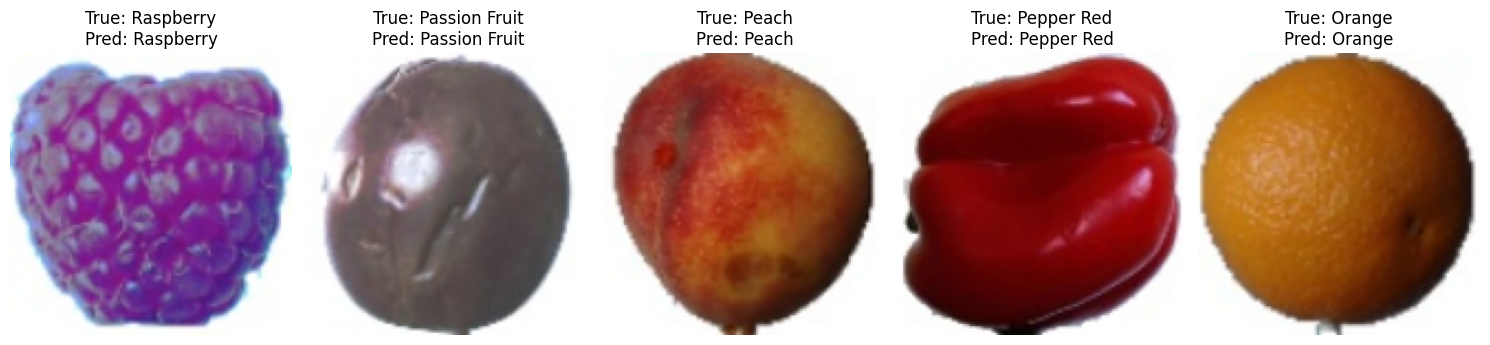

In [ ]:
import random
import numpy as np

# ============================================================
# Function to display image tensor properly
# ============================================================
def imshow_tensor(img_tensor):
    """
    Convert a tensor to a NumPy image for matplotlib display.
    """
    img = img_tensor.cpu().numpy().transpose(1, 2, 0)
    # Since you didn't normalize in your transforms, just clip values
    img = np.clip(img, 0, 1)
    return img

# ============================================================
# Select 5 random samples from validation data
# ============================================================
val_indices = list(range(len(val_data)))
random.shuffle(val_indices)
sample_indices = val_indices[:5]

plt.figure(figsize=(15,6))
model.eval()  # Set model to evaluation mode

for i, idx in enumerate(sample_indices):
    img_tensor, true_label = val_data[idx]  # get image tensor and true label

    # Add batch dimension and move to device
    img_tensor_batch = img_tensor.unsqueeze(0).to(device)

    # Prediction
    with torch.no_grad():
        out = model(img_tensor_batch)
        pred_label = out.argmax(dim=1).item()

    # Convert tensor to displayable image
    img_show = imshow_tensor(img_tensor)

    # Plot
    ax = plt.subplot(1, 5, i+1)
    ax.imshow(img_show)
    ax.set_title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")
    ax.axis("off")

plt.tight_layout()
plt.show()
